In [4]:
import numpy as np
import tensorflow as tf
tf.keras.backend.set_floatx('float64')


### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]

print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [6]:
import numpy as np
import tensorflow as tf
tf.keras.backend.set_floatx('float64')


### Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]

m = 20

### Create model
class Model(object):
    def __init__(self):
        self.W = tf.Variable([[-0.04], [0.02], [-0.03], [0.001]], dtype=tf.float64)
        self.b = tf.Variable(0.01, dtype=tf.float64)
    
    def __call__(self, x):
        return tf.math.sigmoid(tf.matmul(x, self.W) + self.b)
    
model = Model()


### training
learning_rate = 0.1
num_epochs = 100
loss = tf.keras.losses.BinaryCrossentropy()

losses = []
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # output
        output = model(X)
        
        # loss
        loss_v = loss(y, output)
        losses.append(loss_v.numpy())
        
        # gradient
        dW, db = t.gradient(loss_v, [model.W, model.b])
        
        # update
        model.W.assign_sub(learning_rate * dW)
        model.b.assign_sub(learning_rate * db)
        
        # parameters after one epoch
        #print('weight: \n', model.W)
        #print('bias: \n', model.b)

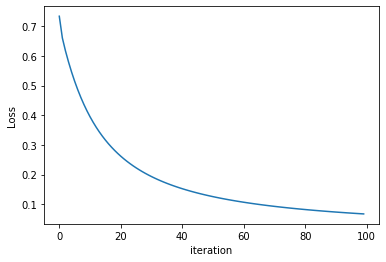

In [8]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [9]:
print('weight: \n', model.W)
print('bias: \n', model.b)

weight: 
 <tf.Variable 'Variable:0' shape=(4, 1) dtype=float64, numpy=
array([[-0.30106036],
       [-1.02650883],
       [ 1.60738949],
       [ 0.70280659]])>
bias: 
 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.1707466914158623>


In [15]:
preds = model(X)

preds = preds.numpy()
preds = preds.round()
print(preds[:, 0])

acc = (preds == y)
print(acc.mean())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
1.0


In [ ]:
preds = model(X)

preds = preds.numpy()
preds = preds.round()

print(preds.shape)
print(y.shape)

acc = (preds == y)
print(acc.mean())